In [1]:
%matplotlib inline
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import KDTree
from knn import MatrixKNN, KDTreeKNN

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('train.csv')

In [3]:
X_train, Y_train = df[df.columns[1:]].values, df['label'].values

In [4]:
def plot_image(img, im_size=28):
    pylab.imshow(img.reshape(im_size, im_size), cmap=pylab.cm.gray)
    
def plot_grid(imgs, nrows, ncols, dataset=X_train, im_size=28):
    figure = pyplot.gcf()
    figure.set_size_inches(17.5,15.5)
    for pylab_index, img in enumerate(imgs):
        pylab.subplot(nrows, ncols, pylab_index + 1)
        plot_image(img)
        pylab.axis('off')

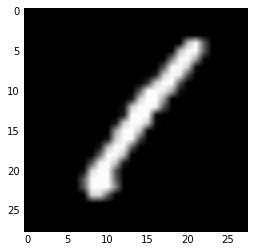

In [5]:
plot_image(X_train[0])

## Plot means

In [6]:
av = []

for c in range(10):
    dists = np.array([])
    ind = np.argwhere(Y_train == c)
    for i in range(len(ind)):
        dists = np.append(dists, np.linalg.norm(X_train[ind[i]]))
    mean_c = X_train[ind[np.argsort(dists)[len(dists)/2]]]
    av.append(mean_c)

/home/student/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


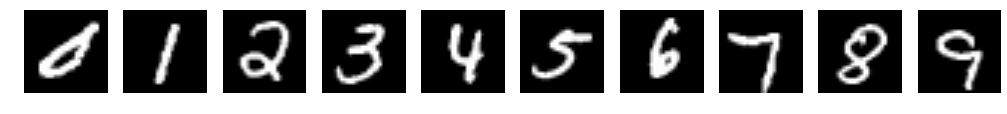

In [7]:
plot_grid(av, nrows=1, ncols=10)

## Matrix Based KNN

In [8]:
classifier2c = MatrixKNN(deg=2)
classifier2c = classifier2c.fit(X_train, Y_train)
%time y_pred = classifier2c.predict(X_train[:100])

CPU times: user 1min 5s, sys: 399 ms, total: 1min 5s
Wall time: 1min 6s


In [9]:
classifier1c = MatrixKNN(deg=1)
classifier1c = classifier1c.fit(X_train, Y_train)
%time y_pred = classifier1c.predict(X_train[:100])

CPU times: user 1min 5s, sys: 20.6 s, total: 1min 25s
Wall time: 53.6 s


In [10]:
classifier0c = MatrixKNN(deg=0)
classifier0c = classifier0c.fit(X_train, Y_train)
%time y_pred = classifier0c.predict(X_train[:100])

CPU times: user 21.2 s, sys: 446 ms, total: 21.6 s
Wall time: 20.9 s


In [11]:
#we use classifier with 2 cycles as an standard

In [12]:
print ("O'key") if np.linalg.norm(classifier2c.dist_mt - classifier1c.dist_mt) < 1e-4 else ("Something's wrong")

O'key


In [13]:
print ("O'key") if np.linalg.norm(classifier2c.dist_mt - classifier0c.dist_mt) < 1e-4 else ("Something's wrong")

O'key


## kd_tree based KNN

In [14]:
# KNN kd_tree

classifier_tree = KDTreeKNN()
classifier_tree = classifier_tree.fit(X_train, Y_train)
%time y_pred = classifier_tree.predict(X_train[:100])

CPU times: user 1.92 s, sys: 857 µs, total: 1.92 s
Wall time: 1.92 s


## Accuracy score and Cross Validation Prosses


In [15]:
def accuracy(real_y, pred_y):
    result = 0
    num_right = 0
    num_obj = len(real_y)
    for i in range(num_obj):
        if(real_y[i] == pred_y[i]):
                   num_right += 1
    result = float(num_right)/num_obj
    return result

In [16]:
def cross_validation(X, y, cv_fold=5, num_neigh = 1):
    scores = []
    num_obj = len(X)
    for i in range (cv_fold - 1):
        startpoint = num_obj*i/cv_fold
        end__point = num_obj*(i+1)/cv_fold
        knn_cv = KDTreeKNN()
        X_fit = np.append(X[:startpoint], X[end__point:], 0)
        Y_fit = np.append(y[:startpoint], y[end__point:])
        X_pred = X[startpoint:end__point]
        Y_pred = y[startpoint:end__point]
        knn_cv = knn_cv.fit(X_fit, Y_fit)
        answers = knn_cv.predict(X_pred, num_neigh)
        scores.append(accuracy(Y_pred, answers))
    return np.mean(scores)

In [17]:
#test
for i in range(10):
    print (cross_validation(X_train[:100], Y_train[:100], num_neigh = i + 1))

/home/student/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/student/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/student/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/student/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.675
0.675
0.625
0.6625
0.6375
0.6125
0.575
0.5875
0.5875
0.575


/home/student/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/student/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/student/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/student/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


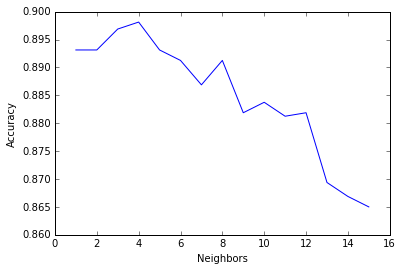

In [18]:
scores = []
for i in range(15):
    scores.append(cross_validation(X_train[:2000], Y_train[:2000], 5, i + 1))
plt.plot([i+1 for i in range(15)], scores)
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.show()

